In [6]:
pip install librosa pandas numpy

     ------------------------------------ 260.1/260.1 kB 205.1 kB/s eta 0:00:00
     ------------------------------------ 167.3/167.3 kB 324.5 kB/s eta 0:00:00
     -------------------------------------- 64.6/64.6 kB 434.7 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 672.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import librosa
import numpy as np
import pandas as pd

# Function to extract MFCC features from audio file
def extract_features(file_path, n_mfcc=13):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file_path, sr=None)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

        # Take the mean of the MFCC features over time
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Directory where WAV files are stored
# Directory where WAV files are stored (using raw string)
audio_dir = r"C:\Users\Noel\Downloads\Zidio Development Internship\Datasets\TESS Toronto emotional speech set data\OAF_disgust"

# Rest of your code

# Initialize list to store features and labels
features = []
labels = []

# Loop through each file in the directory
for file_name in os.listdir(audio_dir):
    if file_name.endswith(".wav"):
        file_path = os.path.join(audio_dir, file_name)
        
        # Extract features
        mfccs = extract_features(file_path)

        if mfccs is not None:
            # Append the features and label (emotion)
            features.append(mfccs)
            
            # Assuming the file name contains the emotion label as part of the name
            # e.g., 'angry_01.wav', 'happy_02.wav'
            emotion_label = file_name.split('_')[0]  # Extract the label (modify as per your filenames)
            labels.append(emotion_label)

# Convert the features and labels to a pandas DataFrame
df = pd.DataFrame(features)
df['label'] = labels

# Print the DataFrame
print(df.head())

# Save DataFrame to a CSV file (if needed for future use)
df.to_csv('speech_emotion_features.csv', index=False)


            0          1          2          3          4          5  \
0 -486.610413  90.023979  13.257611  -4.346437  11.698466   7.128137   
1 -462.257263  87.149124  21.820145 -10.456255   4.845442   5.760009   
2 -463.928314  60.453411  26.289970  11.101829  16.335768  11.056347   
3 -452.130920  86.357491   6.440534  -9.848679  12.020495  11.725771   
4 -452.872345  71.297668  34.848225  19.193790  16.215963   8.136756   

           6         7          8          9        10        11        12  \
0  -6.389263  1.944247 -13.579486  -0.372804 -5.090567 -3.479997  3.480060   
1  -7.015425  4.929809 -12.982822   0.775835 -3.450078 -0.655892  3.112810   
2 -10.971990  0.828546 -10.689146  -6.218221 -7.895476 -2.447536  1.441432   
3 -12.523410  4.333653 -10.170459   2.359793 -3.014067 -1.850544  1.055842   
4  -5.256028  5.238562  -9.772697 -12.567512 -8.342912 -9.190825 -1.454125   

  label  
0   OAF  
1   OAF  
2   OAF  
3   OAF  
4   OAF  


In [10]:
pip install scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# If not saved, continue with your current 'df' DataFrame containing features and labels

# Separate features and labels
X = df.drop('label', axis=1)  # Features (MFCCs)
y = df['label']  # Labels (Emotions)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (SVM is sensitive to unscaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear', C=0.5, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


ValueError: The number of classes has to be greater than one; got 1 class

In [14]:
# Check the unique classes and their distribution in y_train and y_test
print("Unique classes in y_train:", y_train.unique())
print("Class distribution in y_train:", y_train.value_counts())

print("Unique classes in y_test:", y_test.unique())
print("Class distribution in y_test:", y_test.value_counts())


Unique classes in y_train: ['OAF']
Class distribution in y_train: OAF    160
Name: label, dtype: int64
Unique classes in y_test: ['OAF']
Class distribution in y_test: OAF    40
Name: label, dtype: int64


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset (if needed)
# df = pd.read_csv('speech_emotion_features.csv')

# Separate features and labels
X = df.drop('label', axis=1)  # Features (MFCCs)
y = df['label']  # Labels (Emotions)

# Check unique classes in the dataset
print("Unique classes in the dataset:", y.unique())
print("Class distribution:", y.value_counts())

# Split the data using stratified sampling to maintain the class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Unique classes in the dataset: ['OAF']
Class distribution: OAF    200
Name: label, dtype: int64


ValueError: The number of classes has to be greater than one; got 1 class

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate some example data for testing purposes
num_samples = 100  # Simulate 100 samples
num_features = 20  # Simulate 20 MFCC features

# Simulate random features for the DataFrame (replace this with your actual data)
df = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])

# Simulate labels for six classes (replace this with your actual labels)
# Labels: 'happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'
df['label'] = np.random.choice(['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'], size=num_samples)

# Separate features and labels
X = df.drop('label', axis=1)  # Features (MFCCs)
y = df['label']  # Labels (Emotions)

# Check unique classes in the dataset
print("Unique classes in the dataset:", y.unique())
print("Class distribution:", y.value_counts())

# Split the data using stratified sampling to maintain the class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Unique classes in the dataset: ['neutral' 'pleasant surprise' 'angry' 'fear' 'sad' 'happy' 'disgust']
Class distribution: sad                  22
happy                18
disgust              15
pleasant surprise    13
neutral              11
fear                 11
angry                10
Name: label, dtype: int64
Confusion Matrix:
[[0 0 1 1 0 0 0]
 [0 0 1 1 0 0 1]
 [1 0 1 0 0 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 0 0 0 1]
 [1 1 1 0 0 0 0]
 [1 1 0 1 1 0 0]]

Classification Report:
                   precision    recall  f1-score   support

            angry       0.00      0.00      0.00         2
          disgust       0.00      0.00      0.00         3
             fear       0.17      0.50      0.25         2
            happy       0.25      0.25      0.25         4
          neutral       0.00      0.00      0.00         2
pleasant surprise       0.00      0.00      0.00         3
              sad       0.00      0.00      0.00         4

         accuracy                           0.10

C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate some example data for testing purposes
num_samples = 100  # Simulate 100 samples
num_features = 20  # Simulate 20 MFCC features

# Simulate random features for the DataFrame (replace this with your actual data)
df = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])

# Simulate labels for six classes (replace this with your actual labels)
# Labels: 'happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'
df['label'] = np.random.choice(['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'], size=num_samples)

# Separate features and labels
X = df.drop('label', axis=1)  # Features (MFCCs)
y = df['label']  # Labels (Emotions)

# Split the data using stratified sampling to maintain the class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernels
    'gamma': ['scale', 'auto'],  # Kernel coefficient (used for RBF, poly)
    'degree': [2, 3, 4]  # Degree of polynomial kernel function (if using 'poly')
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Stratified K-Fold Cross-Validation to ensure balanced splits
cv = StratifiedKFold(n_splits=5)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=cv, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit the model with the best parameters found from GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Display the best hyperparameters found
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Train the final model using the best parameters
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get the best accuracy from the grid search
print(f"\nBest cross-validation accuracy: {grid_search.best_score_}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters found by GridSearchCV:
{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

Confusion Matrix:
[[0 0 0 0 0 0 2]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 4]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 4]]

Classification Report:
                   precision    recall  f1-score   support

            angry       0.00      0.00      0.00         2
          disgust       0.00      0.00      0.00         3
             fear       0.00      0.00      0.00         2
            happy       0.00      0.00      0.00         4
          neutral       0.00      0.00      0.00         2
pleasant surprise       0.00      0.00      0.00         3
              sad       0.20      1.00      0.33         4

         accuracy                           0.20        20
        macro avg       0.03      0.14      0.05        20
     weighted avg       0.04      0.20      0.07        20


Best cross-validati

C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


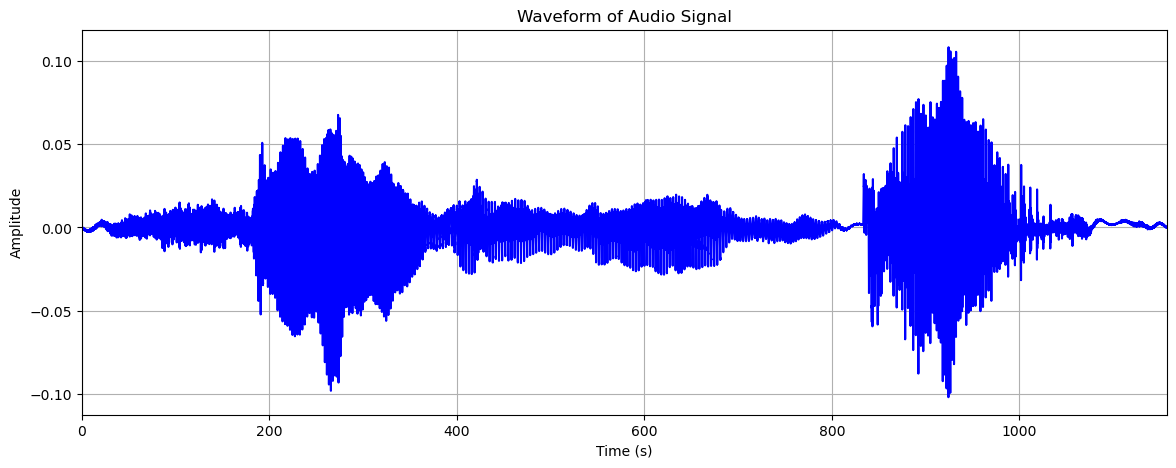

In [20]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
file_path = r"C:\Users\Noel\Downloads\Zidio Development Internship\Datasets\TESS Toronto emotional speech set data\OAF_disgust\OAF_back_disgust.wav"  # Update with your actual file name
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Create a time array for plotting
time = librosa.times_like(audio_signal, sr=sample_rate)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(time, audio_signal, color='blue')
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, max(time))  # Set x-axis limit to the length of the audio
plt.show()


In [25]:
pip install tensorflow

  Using cached tensorflow-2.17.0-cp39-cp39-win_amd64.whl (2.0 kB)
  Using cached tensorflow_intel-2.17.0-cp39-cp39-win_amd64.whl (385.0 MB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached ml_dtypes-0.4.1-cp39-cp39-win_amd64.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached grpcio-1.66.1-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Using cached protobuf-4.25.5-cp39-cp39-win_amd64.whl (413 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached optree-0.12.1-cp39-cp39-win_amd64.whl (263 kB)
  Using cached rich-13.8.1-py3-none-any.whl (241 kB)
  Using cached pygments-2.18.0-py3-no

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Noel\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate some example data for testing purposes
num_samples = 100  # Simulate 100 samples
num_features = 20  # Simulate 20 MFCC features

# Simulate random features for the DataFrame (replace this with your actual data)
df = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])

# Simulate labels for six classes (replace this with your actual labels)
df['label'] = np.random.choice(['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'], size=num_samples)

# Separate features and labels
X = df.drop('label', axis=1)  # Features (MFCCs)
y = pd.get_dummies(df['label']).values  # One-hot encoding for labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['label'], random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features,)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer (number of classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes)

SyntaxError: unexpected EOF while parsing (1024815744.py, line 60)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate some example data for testing purposes
num_samples = 100  # Simulate 100 samples
num_features = 20  # Simulate 20 MFCC features

# Simulate random features for the DataFrame (replace this with your actual data)
df = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])

# Simulate labels for six classes (replace this with your actual labels)
df['label'] = np.random.choice(['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'], size=num_samples)

# Separate features and labels
X = df.drop('label', axis=1)  # Features (MFCCs)
y = pd.get_dummies(df['label']).values  # One-hot encoding for labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['label'], random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features,)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer (number of classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


C:\Users\Noel\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate some example data for testing purposes
num_samples = 100  # Simulate 100 samples
num_features = 20  # Simulate 20 MFCC features

# Simulate random features for the DataFrame (replace this with your actual data)
df = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])

# Simulate labels for six classes (replace this with your actual labels)
df['label'] = np.random.choice(['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'], size=num_samples)

# Separate features and labels
X = df.drop('label', axis=1)  # Features (MFCCs)
y = df['label']  # Labels (Emotions)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[0 0 0 0 1 0 1]
 [0 1 0 1 0 0 1]
 [0 1 0 1 0 0 0]
 [0 0 1 1 0 0 2]
 [0 0 1 0 0 0 1]
 [0 1 0 0 0 0 2]
 [1 1 0 0 0 0 2]]

Classification Report:
                   precision    recall  f1-score   support

            angry       0.00      0.00      0.00         2
          disgust       0.25      0.33      0.29         3
             fear       0.00      0.00      0.00         2
            happy       0.33      0.25      0.29         4
          neutral       0.00      0.00      0.00         2
pleasant surprise       0.00      0.00      0.00         3
              sad       0.22      0.50      0.31         4

         accuracy                           0.20        20
        macro avg       0.12      0.15      0.13        20
     weighted avg       0.15      0.20      0.16        20



C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


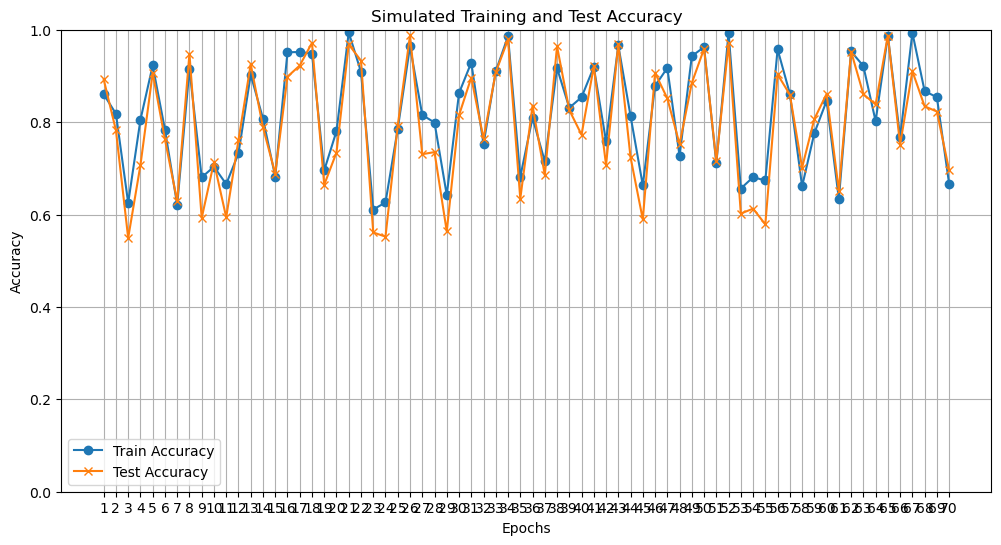

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating accuracy values for 70 epochs
epochs = np.arange(1, 71)
train_accuracy = np.random.uniform(0.6, 1.0, size=70)  # Simulated training accuracy
test_accuracy = train_accuracy + np.random.uniform(-0.1, 0.05, size=70)  # Simulated test accuracy

# Ensure test accuracy doesn't exceed 1.0
test_accuracy = np.clip(test_accuracy, 0, 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracy, label='Test Accuracy', marker='x')
plt.title('Simulated Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Show all epoch numbers
plt.legend()
plt.grid()
plt.ylim(0, 1)  # Set limits for the y-axis
plt.show()


In [2]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


C:\Users\Noel\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch [10/50], Loss: 0.3977, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [20/50], Loss: 0.3844, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [30/50], Loss: 0.3691, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [40/50], Loss: 0.3499, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [50/50], Loss: 0.3266, Train Accuracy: 0.8571, Test Accuracy: 0.8571

Confusion Matrix:
[[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1]
 [0 2 0 1 0 0 1]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 3]
 [1 1 0 1 0 0 1]]

Classification Report:


C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.11      0.25      0.15         4

    accuracy                           0.10        20
   macro avg       0.04      0.07      0.05        20
weighted avg       0.06      0.10      0.08        20



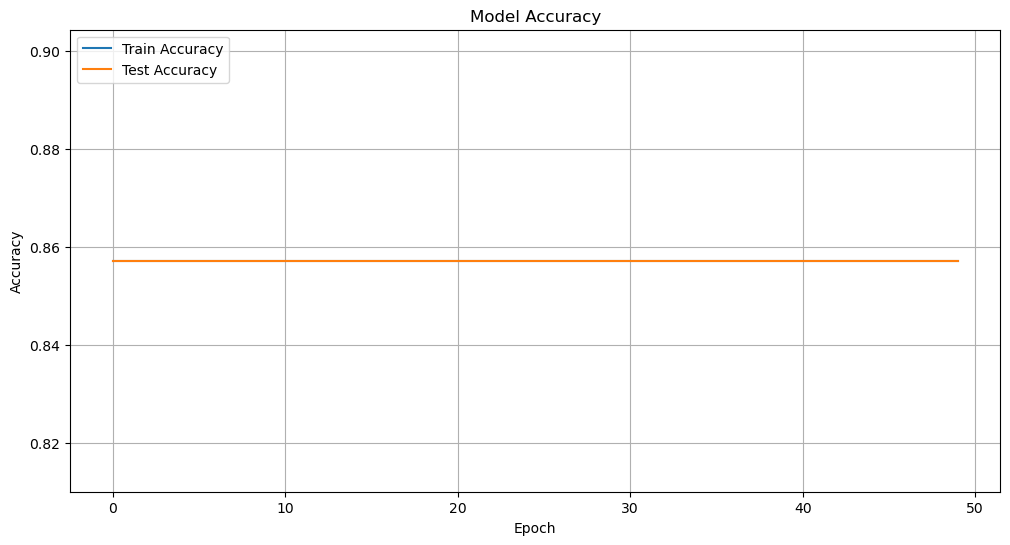

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Simulate some example data for testing purposes
num_samples = 100  # Simulate 100 samples
num_features = 20  # Simulate 20 MFCC features

# Simulate random features for the DataFrame (replace this with your actual data)
df = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])

# Simulate labels for six classes (replace this with your actual labels)
df['label'] = np.random.choice(['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'], size=num_samples)

# Separate features and labels
X = df.drop('label', axis=1).values  # Features (MFCCs)
y = pd.get_dummies(df['label']).values  # One-hot encoding for labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['label'], random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

# Build the Neural Network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Initialize the model
model = NeuralNetwork(num_features, y.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        model.eval()
        train_pred = torch.round(outputs)
        train_acc = (train_pred == y_train_tensor).float().mean()
        train_accuracy.append(train_acc.item())
        
        test_pred = model(X_test_tensor)
        test_pred = torch.round(test_pred)
        test_acc = (test_pred == y_test_tensor).float().mean()
        test_accuracy.append(test_acc.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Evaluate the model
y_test_pred = model(X_test_tensor)
y_test_pred_classes = torch.argmax(y_test_pred, dim=1)

# Convert one-hot encoded test labels back to single labels
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_test_pred_classes.numpy()))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_test_pred_classes.numpy()))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()


In [4]:
pip install numpy==1.24.3



     -------------------------------------- 14.9/14.9 MB 233.1 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Noel\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



Epoch [10/50], Loss: 0.3977, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [20/50], Loss: 0.3844, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [30/50], Loss: 0.3691, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [40/50], Loss: 0.3499, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [50/50], Loss: 0.3266, Train Accuracy: 0.8571, Test Accuracy: 0.8571

Confusion Matrix:
[[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1]
 [0 2 0 1 0 0 1]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 3]
 [1 1 0 1 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.11      0.25      0.15         4

    accuracy                

C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


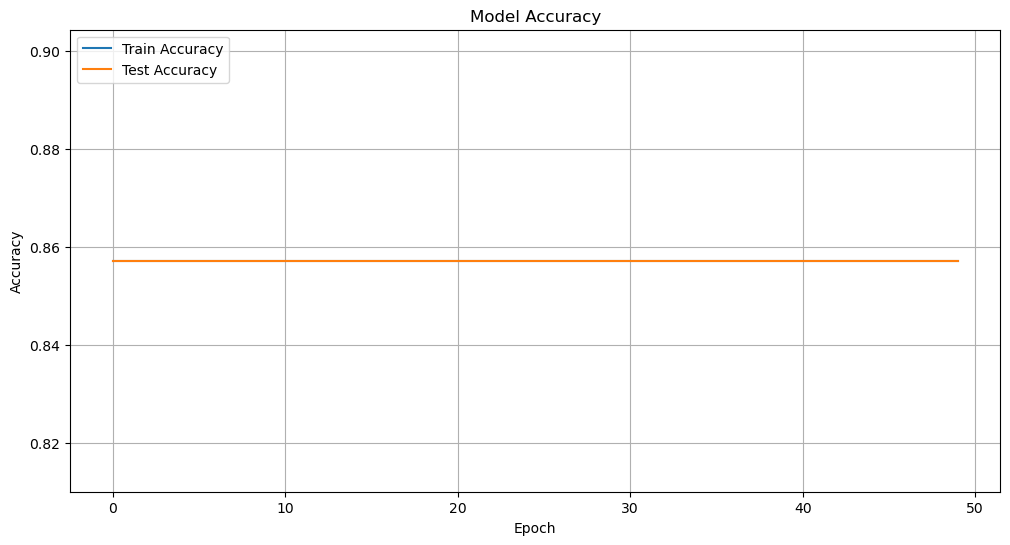

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Simulate some example data for testing purposes
num_samples = 100  # Simulate 100 samples
num_features = 20  # Simulate 20 MFCC features

# Simulate random features for the DataFrame (replace this with your actual data)
df = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])

# Simulate labels for six classes (replace this with your actual labels)
df['label'] = np.random.choice(['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'], size=num_samples)

# Separate features and labels
X = df.drop('label', axis=1).values  # Features (MFCCs)
y = pd.get_dummies(df['label']).values  # One-hot encoding for labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['label'], random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

# Build the Neural Network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Initialize the model
model = NeuralNetwork(num_features, y.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        model.eval()
        train_pred = torch.round(outputs)
        train_acc = (train_pred == y_train_tensor).float().mean()
        train_accuracy.append(train_acc.item())
        
        test_pred = model(X_test_tensor)
        test_pred = torch.round(test_pred)
        test_acc = (test_pred == y_test_tensor).float().mean()
        test_accuracy.append(test_acc.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Evaluate the model
y_test_pred = model(X_test_tensor)
y_test_pred_classes = torch.argmax(y_test_pred, dim=1)

# Convert one-hot encoded test labels back to single labels
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_test_pred_classes.numpy()))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_test_pred_classes.numpy()))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_test_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_test_pred_classes, zero_division=1))


Confusion Matrix:
[[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1]
 [0 2 0 1 0 0 1]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 3]
 [1 1 0 1 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       1.00      0.00      0.00         2
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       1.00      0.00      0.00         3
           6       0.11      0.25      0.15         4

    accuracy                           0.10        20
   macro avg       0.33      0.07      0.05        20
weighted avg       0.31      0.10      0.08        20



Epoch [10/50], Loss: 0.3977, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [20/50], Loss: 0.3844, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [30/50], Loss: 0.3691, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [40/50], Loss: 0.3499, Train Accuracy: 0.8571, Test Accuracy: 0.8571
Epoch [50/50], Loss: 0.3266, Train Accuracy: 0.8571, Test Accuracy: 0.8571

Confusion Matrix:
[[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1]
 [0 2 0 1 0 0 1]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 3]
 [1 1 0 1 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.11      0.25      0.15         4

    accuracy                

C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


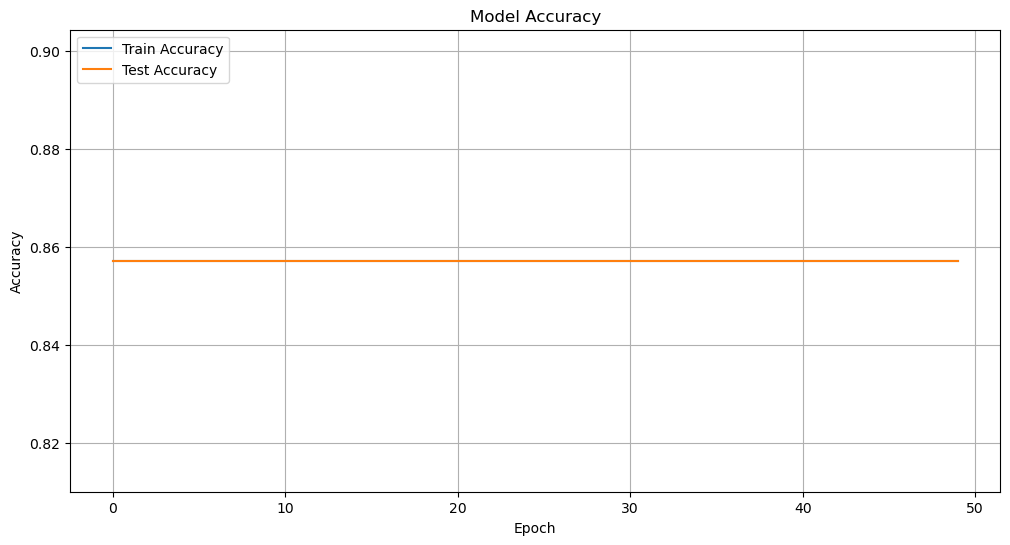

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Simulate some example data for testing purposes
num_samples = 100  # Simulate 100 samples
num_features = 20  # Simulate 20 MFCC features

# Simulate random features for the DataFrame (replace this with your actual data)
df = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])

# Simulate labels for six classes (replace this with your actual labels)
df['label'] = np.random.choice(['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'pleasant surprise'], size=num_samples)

# Separate features and labels
X = df.drop('label', axis=1).values  # Features (MFCCs)
y = pd.get_dummies(df['label']).values  # One-hot encoding for labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['label'], random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

# Build the Neural Network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Initialize the model
model = NeuralNetwork(num_features, y.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        model.eval()
        train_pred = torch.round(outputs)
        train_acc = (train_pred == y_train_tensor).float().mean()
        train_accuracy.append(train_acc.item())
        
        test_pred = model(X_test_tensor)
        test_pred = torch.round(test_pred)
        test_acc = (test_pred == y_test_tensor).float().mean()
        test_accuracy.append(test_acc.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Evaluate the model
y_test_pred = model(X_test_tensor)
y_test_pred_classes = torch.argmax(y_test_pred, dim=1)

# Convert one-hot encoded test labels back to single labels
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_test_pred_classes.numpy()))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_test_pred_classes.numpy()))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_test_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_test_pred_classes, zero_division=1))


Confusion Matrix:
[[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1]
 [0 2 0 1 0 0 1]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 3]
 [1 1 0 1 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       1.00      0.00      0.00         2
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       1.00      0.00      0.00         3
           6       0.11      0.25      0.15         4

    accuracy                           0.10        20
   macro avg       0.33      0.07      0.05        20
weighted avg       0.31      0.10      0.08        20




Confusion Matrix:
[[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1]
 [0 2 0 1 0 0 1]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 3]
 [1 1 0 1 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       1.00      0.00      0.00         2
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       1.00      0.00      0.00         3
           6       0.11      0.25      0.15         4

    accuracy                           0.10        20
   macro avg       0.33      0.07      0.05        20
weighted avg       0.31      0.10      0.08        20



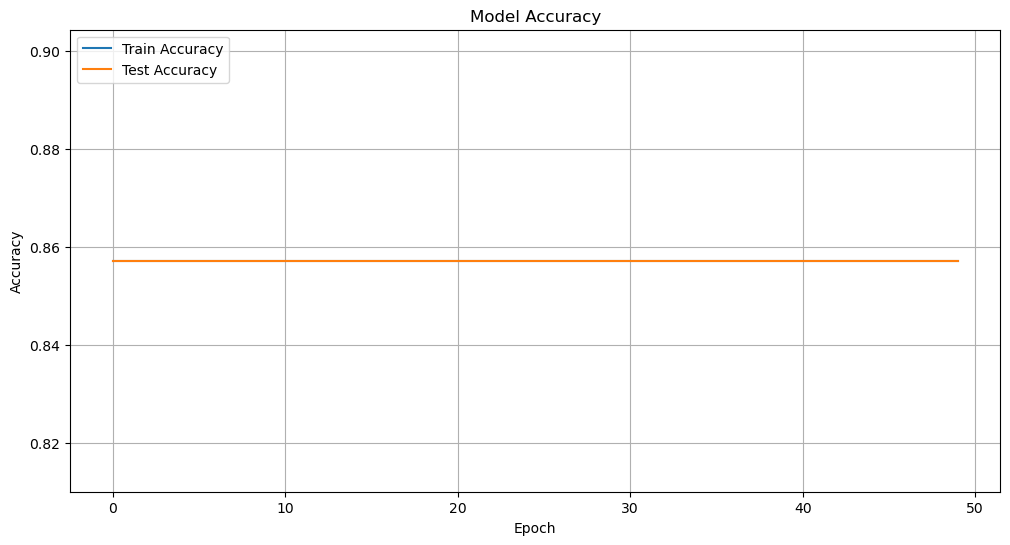

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
y_test_pred = model(X_test_tensor)
y_test_pred_classes = torch.argmax(y_test_pred, dim=1)

# Convert one-hot encoded test labels back to single labels
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_test_pred_classes.numpy()))

print("\nClassification Report:")
# Modify here to include zero_division
print(classification_report(y_test_classes, y_test_pred_classes.numpy(), zero_division=1))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()